In [1]:
from sklearn.svm import OneClassSVM
# from sklearn.datasets import make_blobs
# from numpy import quantile, where, random
import matplotlib.pyplot as plt

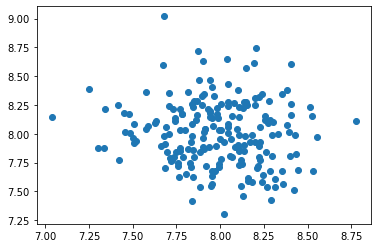

In [4]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()

X_training = x

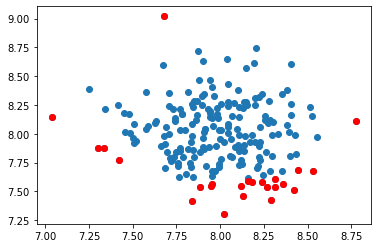

In [7]:
# Classifying with classifier output
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)

svm.fit(X_training)
pred = svm.predict(X_training)

anom_index = where(pred==-1)
X_anomaly = X_training[anom_index]

plt.scatter(X_training[:,0], X_training[:,1])
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], color='r')
plt.show()

In [ ]:
# Classifiying with a threshold
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)

pred = svm.fit_predict(x)
scores = svm.score_samples(x)

thresh = quantile(scores, 0.03)
print(thresh)
index = where(scores<=thresh)
X_anomaly = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], color='r')
plt.show()